## The Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'


In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

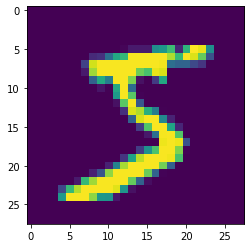

In [5]:
plt.imshow(X_train[0])

In [6]:
X_train = X_train/255
X_test = X_test/255

## Basic AutoEncoder

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [8]:
783/2

391.5

In [9]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [10]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [11]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="binary_crossentropy",optimizer=SGD(lr=1.5),metrics=['accuracy'])

In [12]:
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 25)                420625    
_________________________________________________________________
sequential_1 (Sequential)    (None, 28, 28)            421384    
Total params: 842,009
Trainable params: 842,009
Non-trainable params: 0
_________________________________________________________________


In [13]:
autoencoder.fit(X_train, X_train, epochs=5, validation_data=[X_test, X_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 22s 368us/sample - loss: 0.2466 - accuracy: 0.7909 - val_loss: 0.2121 - val_accuracy: 0.7898
Epoch 2/5
60000/60000 [==============================] - 22s 369us/sample - loss: 0.1950 - accuracy: 0.7967 - val_loss: 0.1782 - val_accuracy: 0.7983
Epoch 3/5
60000/60000 [==============================] - 21s 358us/sample - loss: 0.1701 - accuracy: 0.8002 - val_loss: 0.1594 - val_accuracy: 0.7997
Epoch 4/5
60000/60000 [==============================] - 22s 371us/sample - loss: 0.1541 - accuracy: 0.8029 - val_loss: 0.1459 - val_accuracy: 0.8048
Epoch 5/5
60000/60000 [==============================] - 22s 369us/sample - loss: 0.1441 - accuracy: 0.8050 - val_loss: 0.1392 - val_accuracy: 0.8046


In [14]:
passed_images = autoencoder.predict(X_test[:10])

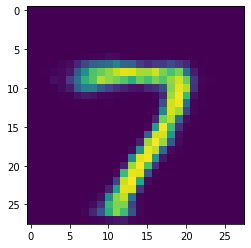

In [15]:
plt.imshow(passed_images[0])

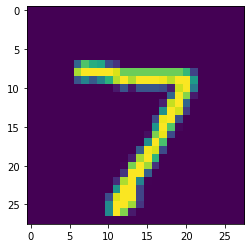

In [16]:
plt.imshow(X_test[0])

# AutoEncoders for Denoising Images

In [17]:
from tensorflow.keras.layers import GaussianNoise

In [18]:
sample = GaussianNoise(0.2)

In [19]:
noisey = sample(X_test[0:2],training=True)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



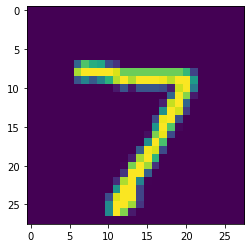

In [20]:
plt.imshow(X_test[0])

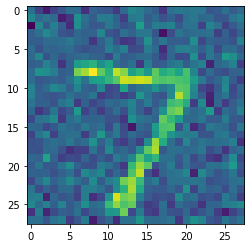

In [21]:
plt.imshow(noisey[0])

### Create  noise removal autoencoder and train it.

In [22]:
import tensorflow as tf
import numpy as np

In [23]:
# TO create the exact same noise as us (optional)
tf.random.set_seed(101)
np.random.seed(101)


encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
# Add noise to images before going through autoencoder
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [24]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [25]:
noise_remover = Sequential([encoder, decoder])

In [26]:
noise_remover.compile(loss="binary_crossentropy", optimizer='adam',metrics=['accuracy'])

In [27]:
noise_remover.fit(X_train, X_train, epochs=8,
                           validation_data=[X_test, X_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 38s 632us/sample - loss: 0.1700 - accuracy: 0.8012 - val_loss: 0.1316 - val_accuracy: 0.8066
Epoch 2/8
60000/60000 [==============================] - 36s 592us/sample - loss: 0.1284 - accuracy: 0.8082 - val_loss: 0.1188 - val_accuracy: 0.8086
Epoch 3/8
60000/60000 [==============================] - 36s 593us/sample - loss: 0.1202 - accuracy: 0.8096 - val_loss: 0.1127 - val_accuracy: 0.8094
Epoch 4/8
60000/60000 [==============================] - 36s 603us/sample - loss: 0.1154 - accuracy: 0.8105 - val_loss: 0.1099 - val_accuracy: 0.8100
Epoch 5/8
60000/60000 [==============================] - 37s 621us/sample - loss: 0.1123 - accuracy: 0.8110 - val_loss: 0.1072 - val_accuracy: 0.8108
Epoch 6/8
60000/60000 [==============================] - 36s 605us/sample - loss: 0.1094 - accuracy: 0.8115 - val_loss: 0.1044 - val_accuracy: 0.8110
Epoch 7/8
60000/60000 [===========================

In [28]:
ten_noisey_images = sample(X_test[0:10],training=True)
denoised = noise_remover(ten_noisey_images[0:10])

The Original


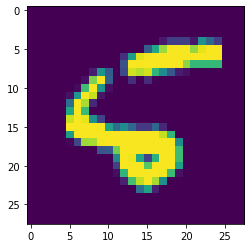

The Noisey Version


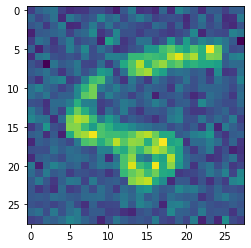

After going through denoiser


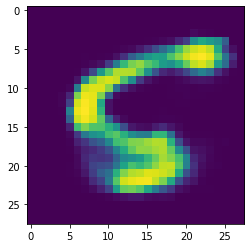

In [32]:
n = 8
print("The Original")
plt.imshow(X_test[n])
plt.show()
print("The Noisey Version")
plt.imshow(ten_noisey_images[n])
plt.show()
print("After going through denoiser")
plt.imshow(denoised[n])
plt.show()